In [1]:
import pyspark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1590747163861_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.9.0  
boto                       2.49.0 
jmespath                   0.9.5  
lxml                       4.5.0  
mysqlclient                1.4.2  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.16.5 
pip                        9.0.1  
py-dateutil                2.2    
python37-sagemaker-pyspark 1.3.0  
pytz                       2019.3 
PyYAML                     5.3.1  
setuptools                 28.8.0 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.29.0 
windmill                   1.6

In [3]:
df = spark.read.csv('s3://xebia-propensity/training_sample.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)

In [5]:
print(f'Total Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Rows: 455,402

In [6]:
sc.install_pypi_package("pandas==0.25.1")#Install pandas version 0.25.1 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") 
sc.install_pypi_package("seaborn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                        _c0                _c1  ...    _c23     _c24
0                                    UserID  basket_icon_click  ...  loc_uk  ordered
1       a720-6b732349-a720-4862-bd21-644732                  0  ...       1        0
2       a0c0-6b73247c-a0c0-4bd9-8baa-797356                  0  ...       1        0
3       86a8-6b735c67-86a8-407b-ba24-333055                  0  ...       1        0
4       6a3d-6b736346-6a3d-4085-934b-396834                  0  ...       1        0
...                                     ...                ...  ...     ...      ...
455397  5624-06d73a79-5624-450a-acdd-367154                  0  ...       1        0
455398  42a3-06d74c74-42a3-4dc9-b874-727916                  0  ...       1        0
455399  104a-06d7a875-104a-428d-b2b8-358312                  0  ...       1        0
455400   d9b1-06d7a928-d9b1-40d9-a2d6-32624                  0  ...       1        0
455401  7aav-06d7bd20-7aav-411b-bc9c-325055                  1  .

In [8]:
df.describe('_c24').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+
|summary|               _c24|
+-------+-------------------+
|  count|             455402|
|   mean|0.04192568747104201|
| stddev| 0.2004195908705846|
|    min|                  0|
|    max|            ordered|
+-------+-------------------+

In [9]:
ndf = df.drop('_c0')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType, IntegerType, StringType
dfa = ndf.select(*(col(c).cast("float").alias(c) for c in ndf.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
from pyspark.mllib.stat import Statistics
import pandas as pd

def compute_correlation_matrix(df, method='spearman'):
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
dfa.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(_c1=None, _c2=None, _c3=None, _c4=None, _c5=None, _c6=None, _c7=None, _c8=None, _c9=None, _c10=None, _c11=None, _c12=None, _c13=None, _c14=None, _c15=None, _c16=None, _c17=None, _c18=None, _c19=None, _c20=None, _c21=None, _c22=None, _c23=None, _c24=None), Row(_c1=0.0, _c2=0.0, _c3=0.0, _c4=0.0, _c5=0.0, _c6=0.0, _c7=0.0, _c8=0.0, _c9=0.0, _c10=0.0, _c11=1.0, _c12=0.0, _c13=0.0, _c14=0.0, _c15=0.0, _c16=0.0, _c17=0.0, _c18=0.0, _c19=1.0, _c20=0.0, _c21=0.0, _c22=0.0, _c23=1.0, _c24=0.0), Row(_c1=0.0, _c2=0.0, _c3=0.0, _c4=0.0, _c5=0.0, _c6=0.0, _c7=0.0, _c8=0.0, _c9=0.0, _c10=0.0, _c11=0.0, _c12=0.0, _c13=0.0, _c14=0.0, _c15=0.0, _c16=0.0, _c17=0.0, _c18=0.0, _c19=1.0, _c20=0.0, _c21=0.0, _c22=0.0, _c23=1.0, _c24=0.0), Row(_c1=0.0, _c2=0.0, _c3=0.0, _c4=0.0, _c5=0.0, _c6=0.0, _c7=0.0, _c8=0.0, _c9=0.0, _c10=0.0, _c11=0.0, _c12=0.0, _c13=0.0, _c14=0.0, _c15=0.0, _c16=0.0, _c17=0.0, _c18=0.0, _c19=1.0, _c20=0.0, _c21=0.0, _c22=1.0, _c23=1.0, _c24=0.0), Row(_c1=0.0, _c2=0.0, _c3=0.0, 

In [13]:
corr = compute_correlation_matrix(dfa)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
corr

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           _c1       _c2       _c3  ...      _c22      _c23      _c24
_c1   1.000000  0.466685  0.529957  ...  0.126652  0.018546  0.428354
_c2   0.466685  1.000000  0.340985  ...  0.057458  0.018830  0.287695
_c3   0.529957  0.340985  1.000000  ...  0.057693  0.030982  0.414438
_c4   0.073052  0.106891  0.085887  ...  0.010389 -0.051099  0.054691
_c5   0.082934  0.061510  0.124267  ...  0.002112 -0.041605  0.071555
_c6   0.057358  0.029125  0.037606  ...  0.016619 -0.001242  0.057444
_c7   0.109392  0.096666  0.109090  ...  0.019202 -0.018746  0.056614
_c8   0.044263  0.019196  0.050825  ...  0.013219 -0.010737  0.023694
_c9   0.291620  0.469634  0.247217  ...  0.100149 -0.002292  0.154888
_c10  0.323971  0.208130  0.222480  ...  0.052882  0.015417  0.140083
_c11  0.405805  0.264791  0.404151  ...  0.039479  0.021054  0.798729
_c12  0.067217  0.030552  0.090495  ... -0.009829 -0.003401  0.059590
_c13  0.478847  0.312297  0.461672  ...  0.081448  0.014895  0.665567
_c14  0.458789  0.29

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

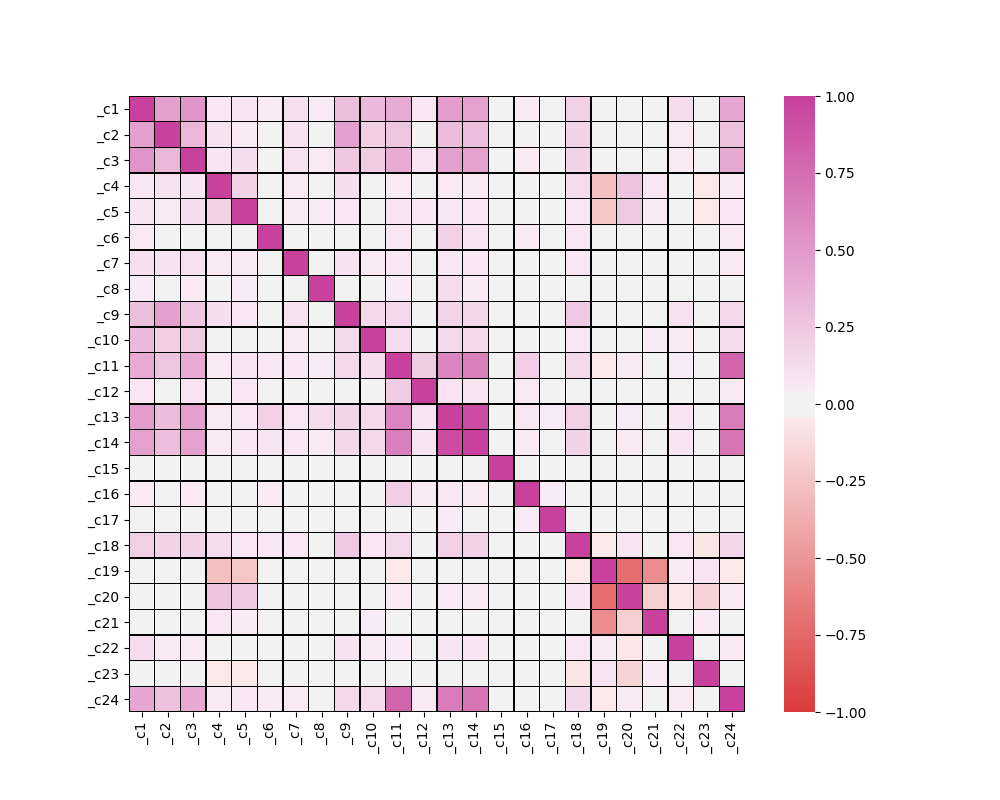

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(12,331, as_cmap=True),
            square=True, ax=ax,  vmin=-1, vmax=1, center= 0,linewidths=0.1, linecolor='black')
%matplot plt